# Развлекательное приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.
Нам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

# Описание данных
В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.
Структура orders_info_short.csv:
* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.
Структура costs_info_short.csv:
* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [9]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

In [10]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # заказы
    pd.read_csv('costs_info_short.csv'),  # расходы
)

Приведем названия к нижнему регистру, заменим пробелы на нижнее подчеркивание.

In [11]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
print(visits.columns, orders.columns, costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object') Index(['user_id', 'event_dt', 'revenue'], dtype='object') Index(['dt', 'channel', 'costs'], dtype='object')


In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [15]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Выведем количество пропущенных значений для каждого столбца

In [16]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [17]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [18]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

Пропусков нет.Проверим на явные пропуски.

In [19]:
visits.duplicated().sum()

0

In [20]:
orders.duplicated().sum()

0

In [21]:
costs.duplicated().sum()

0

Явных пропусков нет.Проверим на неявные пропуски.

In [22]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [23]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [24]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявных пропусков нет.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [25]:
# добавляем параметр costs — траты на рекламу
def get_profiles(visits, orders, costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC


In [26]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time



In [27]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [28]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [29]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [30]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [31]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [32]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Зададим момент анализа-это максимальная дата, горизонт анализа и построим таблицу профилей пользователей.

In [33]:
observation_date = datetime(2019, 10, 27).date()  # момент анализа
horizon_days = 14  # горизонт анализа

In [34]:
profiles=get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Минимальная дата привлечения пользователей.

In [35]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

Максимальная дата привлечения пользователей.

In [36]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

Максимальная и минимальая дата привлечения пользователей сопадают с адатами указанными в задании.

In [37]:


profiles_true_false=profiles.groupby('region').agg({ 'user_id': 'nunique', 'payer':'sum'}).rename(columns={'payer': 'true', 'user_id':'all_users'})

profiles_true_false['perc_true']=(profiles_true_false['true']/profiles_true_false['all_users']*100).round(2)
profiles_true_false = profiles_true_false.sort_values(by='perc_true', ascending=False)

profiles_true_false

,all_users,true,perc_true
region,,,
United States,100002,6902,6.90
Germany,14981,616,4.11
UK,17575,700,3.98
France,17450,663,3.80


Больше всего платящих пользователей в США 6.9% от общего числа пользователей. Меньше всего во Франции - 3.8%.

In [38]:
# смотрим окупаемость с разбивкой по устройствам


profiles_true_false=profiles.groupby('device').agg({ 'user_id': 'nunique', 'payer':'sum'}).rename(columns={'payer': 'true', 'user_id':'all_users'})

profiles_true_false['perc_true']=(profiles_true_false['true']/profiles_true_false['all_users']*100).round(2)
profiles_true_false= profiles_true_false.sort_values(by='perc_true', ascending=False)
profiles_true_false



,all_users,true,perc_true
device,,,
Mac,30042,1912,6.36
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05


Больше всего платящих пользователей на Mac 6.36% от общего числа пользователей. Меньше всего PC - 5.05%.

In [39]:


# смотрим окупаемость с разбивкой по источникам привлечения


profiles_true_false=profiles.groupby('channel').agg({ 'user_id': 'nunique', 'payer':'sum'}).rename(columns={'payer': 'true', 'user_id':'all_users'})

profiles_true_false['perc_true']=(profiles_true_false['true']/profiles_true_false['all_users']*100).round(2)
profiles_true_false= profiles_true_false.sort_values(by='perc_true', ascending=False)
profiles_true_false



,all_users,true,perc_true
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


Больше всего окупаемость  с канала FaceBoom-12.20% и AdNonSense-11.34%. Меньше всего OppleCreativeMedia - 2.06%.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Общая сумма расходов на маркетинг.

In [40]:
cost_all=costs['costs'].sum().round(2)
cost_all

105497.3

Траты, распределеные по рекламным источникам.

In [41]:
costs_channel=costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_channel['perc']=((costs_channel['costs']/cost_all)*100).round(2)
costs_channel

,costs,perc
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


Больше всего трат на рекламный источник  TipTop это 51.90% от всего бюджета, меньше всего на YRabbit 0.90%.

Создадим копию таблицы costs. Добавим в нее столбец с неделями.

In [42]:
costs_2 = costs.copy()

costs_2['dt'] = pd.to_datetime(costs_2['dt'])
costs_2['week_costs'] = costs_2['dt'].dt.isocalendar().week

costs_2

,dt,channel,costs,week_costs
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18
...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43
1796,2019-10-24,lambdaMediaAds,6.4,43
1797,2019-10-25,lambdaMediaAds,8.8,43
1798,2019-10-26,lambdaMediaAds,8.8,43


Добавим в costs_2 столбец с неделями.

In [43]:
costs_2['month_costs'] = costs_2['dt'].dt.month
costs_2

,dt,channel,costs,week_costs,month_costs
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


In [44]:
costs_week_channel = (
    costs_2
    .groupby(['week_costs', 'channel' ])
    .agg({'costs':'sum'})
    .sort_values(by='week_costs')
)

costs_week_channel

costs
week_costs channel                    
18         AdNonSense           211.05
           FaceBoom             535.70
           LeapBob               16.80
           MediaTornado          38.64
           OppleCreativeMedia    24.00
...                                ...
43         OppleCreativeMedia   101.50
           RocketSuperAds        50.70
           TipTop              3265.50
           WahooNetBanner       253.20
           lambdaMediaAds        53.60

[260 rows x 1 columns]

Посмотрим траты помесячно и по каналам и построим график.

In [45]:
costs_month = (
    costs_2
    .groupby(['month_costs', 'channel' ])
    .agg({'costs':'sum'})
    .sort_values(by='month_costs')
)

costs_month

costs
month_costs channel                      
5           AdNonSense           1169.700
            FaceBoom             3524.400
            LeapBob               140.280
            MediaTornado          238.560
            OppleCreativeMedia    169.750
            RocketSuperAds        577.980
            TipTop               2981.000
            WahooNetBanner        418.800
            YRabbit               299.700
            lambdaMediaAds        458.400
6           lambdaMediaAds        199.200
            YRabbit               106.200
            WahooNetBanner        921.000
            TipTop               6675.600
            RocketSuperAds        325.715
            FaceBoom             5501.100
            MediaTornado          138.000
            LeapBob               314.580
            AdNonSense            538.650
            OppleCreativeMedia    370.000
7           TipTop               8410.200
            YRabbit                97.380
            WahooNetBanner        851.400
            RocketSuperAds        252.070
            lambdaMediaAds        219.200
            MediaTornado          138.480
            LeapBob               313.530
            FaceBoom             5294.300
            AdNonSense            504.000
            OppleCreativeMedia    366.500
8           lambdaMediaAds        220.000
            YRabbit               124.740
            WahooNetBanner       1040.400
            TipTop              11202.000
            RocketSuperAds        253.110
            OppleCreativeMedia    439.250
            MediaTornado          154.560
            LeapBob               369.810
            FaceBoom             6274.400
            AdNonSense            579.600
9           YRabbit               152.790
            WahooNetBanner        977.400
            lambdaMediaAds        247.200
            TipTop              13232.500
            RocketSuperAds        218.400
            LeapBob               343.980
            MediaTornado          144.720
            FaceBoom             6114.900
            AdNonSense            581.700
            OppleCreativeMedia    427.750
10          YRabbit               163.410
            AdNonSense            537.600
            FaceBoom             5736.500
            LeapBob               315.420
            MediaTornado          140.160
            OppleCreativeMedia    378.000
            RocketSuperAds        205.725
            TipTop              12250.000
            WahooNetBanner        942.000
            lambdaMediaAds        213.600

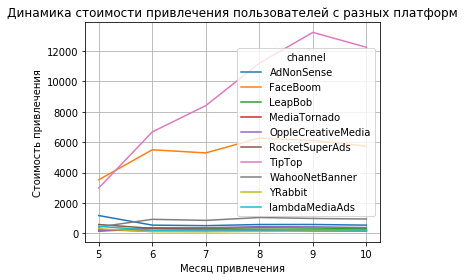

In [46]:

filtered_data = costs_month.pivot_table(
        index='month_costs', columns='channel', values='costs'
    )


filtered_data.plot(grid=True)
plt.ylabel('Стоимость привлечения')
plt.xlabel('Месяц привлечения')
plt.title('Динамика стоимости привлечения пользователей с разных платформ')
    
plt.tight_layout()
plt.show()

На TipTop и на FaceBoom больше всего затрат помесячно. Остальные ниже 2000 и стабильны.

Мы видим, что у TipTop поднялись затраты помесяно примерно 1200 в сентябре (на 5 месяце).

Затраты на FaceBoom постепенно повышаются от 4000 до 6000.

Посмотрим траты понедельно и по каналам, и построим график.

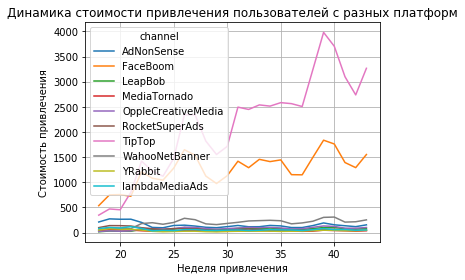

In [47]:
filtered_data = costs_week_channel.pivot_table(
        index='week_costs', columns='channel', values='costs'
    )
filtered_data.plot(grid=True)
plt.ylabel('Стоимость привлечения')
plt.xlabel('Неделя привлечения')
plt.title('Динамика стоимости привлечения пользователей с разных платформ')
    
plt.tight_layout()
plt.show()

На TipTop и на FaceBoom больше всего затрат. Остальные ниже 2000 и стабильны.
TipTop с 500 идет резкий подъем до 1500 на 23 неделе, потом идет падение да 1300 на 25 неделе, следом подъем резкий на 28 неделе до 2500, затем резкое падение на 29 неделе до 1800, на 31 неделе резко ваозращается до 2500, до 36 недели идет равномерно и потом опять резки скачок до 4000 и падение до 3100 на 41 неделе. 
У FaceBoom в идет точно такой же график но ниже.от 500 до 1800.

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [48]:
cac_channel=(
    profiles
    .groupby( 'channel' )
    .agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost')
)

cac_channel['acquisition_cost'] = cac_channel['acquisition_cost'].round(2)

cac_channel

,acquisition_cost
channel,
organic,0.00
LeapBob,0.21
MediaTornado,0.22
YRabbit,0.22
OppleCreativeMedia,0.25
RocketSuperAds,0.41
WahooNetBanner,0.60
lambdaMediaAds,0.72
AdNonSense,1.01


Рассчитаем средний CAC на одного пользователя для всего проекта.

In [55]:
round(profiles['acquisition_cost'].mean(), 2)

0.7

Меньше всего затрат с канала organic и LeapBob больше - с TipTop. Затраты на TipTop в 4 раза выше среднего.

Вывод:

* Больше всего трат на рекламный источник  TipTop это 51.90% от всего бюджета, меньше всего на YRabbit 0.90%.

* На TipTop и на FaceBoom больше всего затрат средних месячных. Остальные ниже 2000 и стабильны.
Мы видим, что у TipTop поднялись средние месячные затраты примерно 12000 в сентябре (на 5 месяце).
Затраты средние месячные на FaceBoom средние месячные постепенно повышаются от 4000 до 6000.

* На TipTop и на FaceBoom больше всего  недельных затрат. Остальные ниже 500 и стабильны.
TipTop с 500 до 4000 волнообразно идут средние недельные затраты на человека.
У FaceBoom в идет точно такой же график но ниже от 500 до 1800 средних недельныч затрат на человека.

* Меньше всего затрат с канала organic и LeapBob больше - с TipTop. Затраты на TipTop в 4 раза выше среднего.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Сделаем копию таблицы profiles и удалим органический канал привлечения.

In [56]:
profiles_2 = profiles.copy()
profiles_2=profiles_2[profiles_2['channel']!='organic']


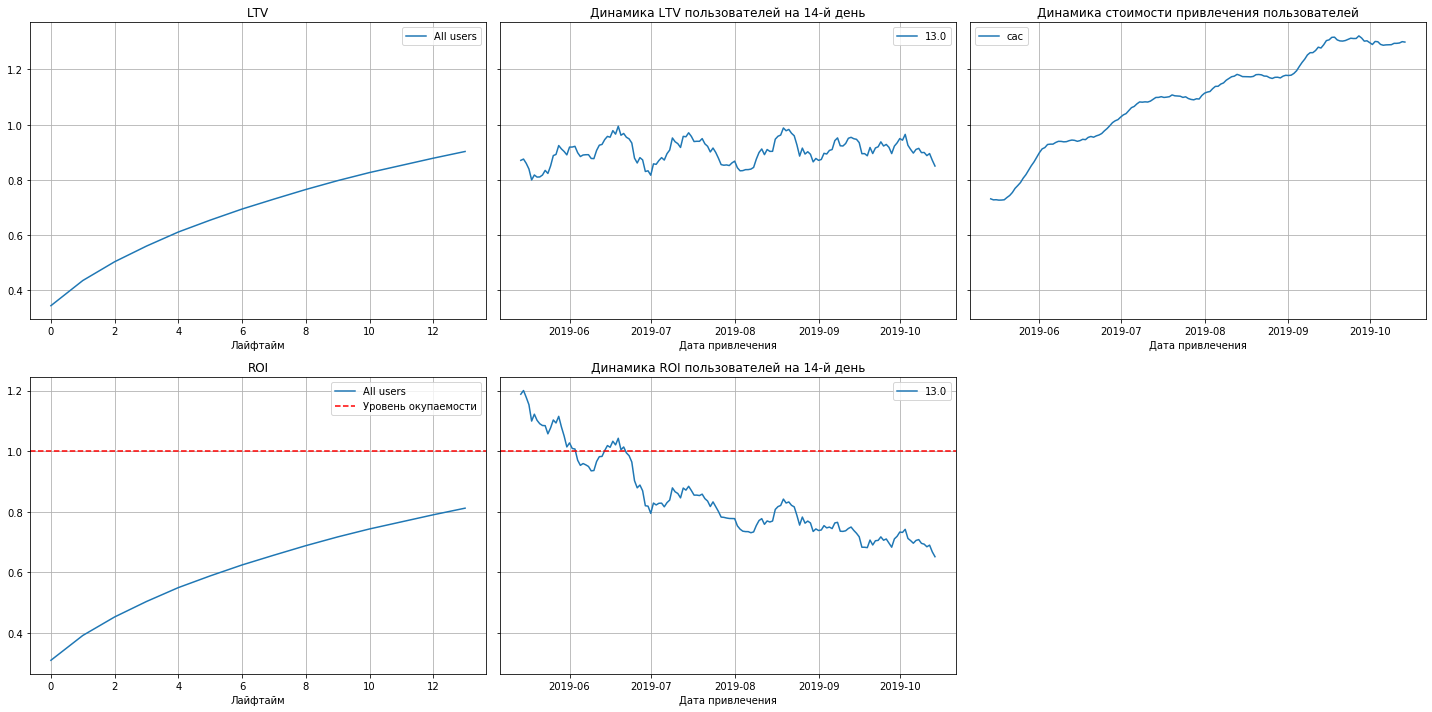

In [57]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
    
    
* Реклама не окупается. ROI в конце двух недель — чуть почти 80%.
* CAC увеличивается. 
* На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. 

Построим САС по каналам привлечения.

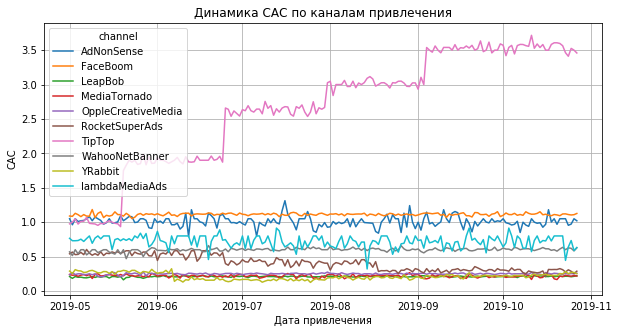

In [58]:
profiles_2.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
    ).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Больше всего затрат на пользователей TipTop.

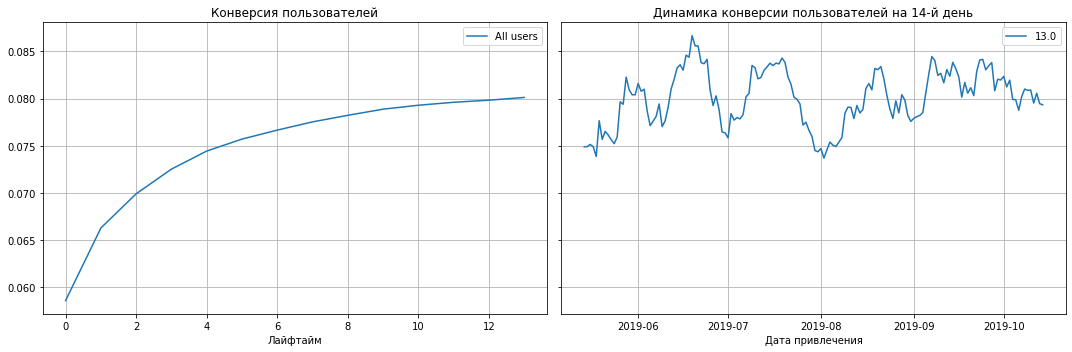

In [59]:
#смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)


Судя по графикам, конверсия пользователей идет очень хорошо, причём постоянно от 0,60 до 0,80.

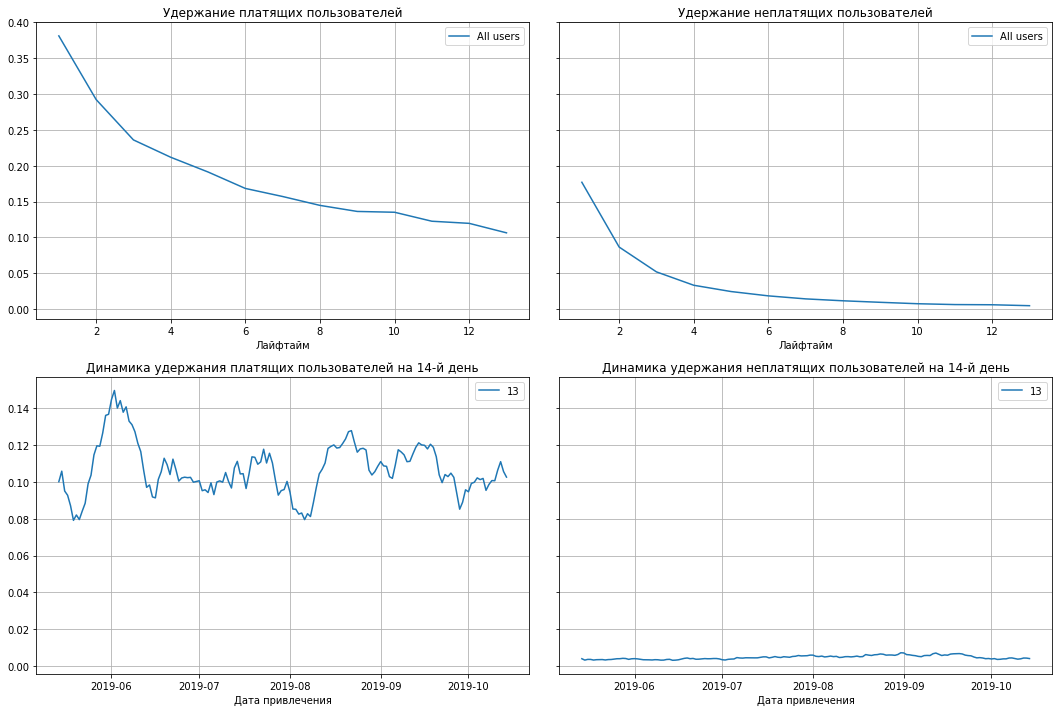

In [60]:
# смотрим удержание 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих и неплатящих пользователей стабильно уменьшается. Но не платящих все равно меньше.

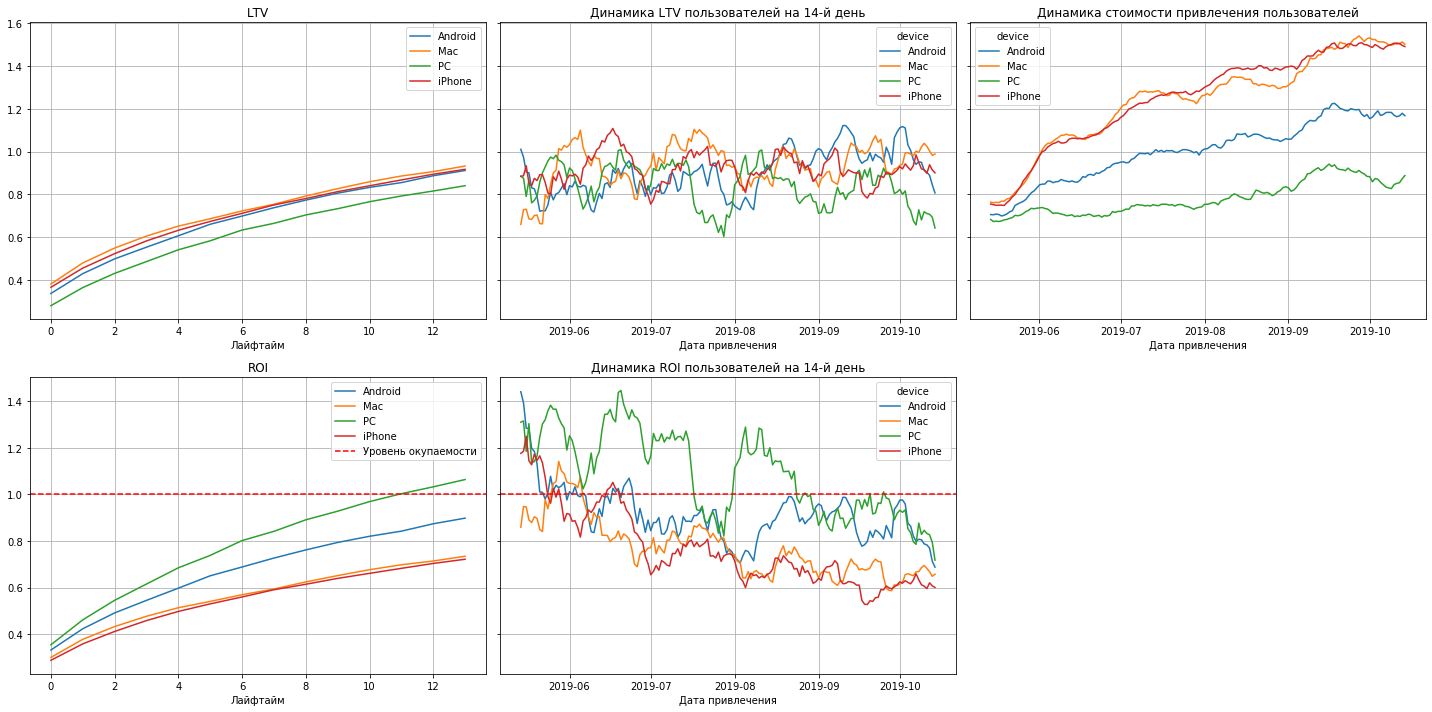

In [61]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)


Вот что говорят графики:
* Реклама окупается у PC на 7 день.У iPhone и Mac не окупается.
* Стоимость привлечения меньше всего у компьютеров и Андроидов, окупаемость тоже выше всего у них, по сравнению с остальными.
* LTV всё так же подвержен сезонности на всех устройствах, но в целом все стабильно.
* Стоимость привлечения больше всего у Маков и айфонов, окупаемость тоже ниже всего у них, по сравнению с остальными.

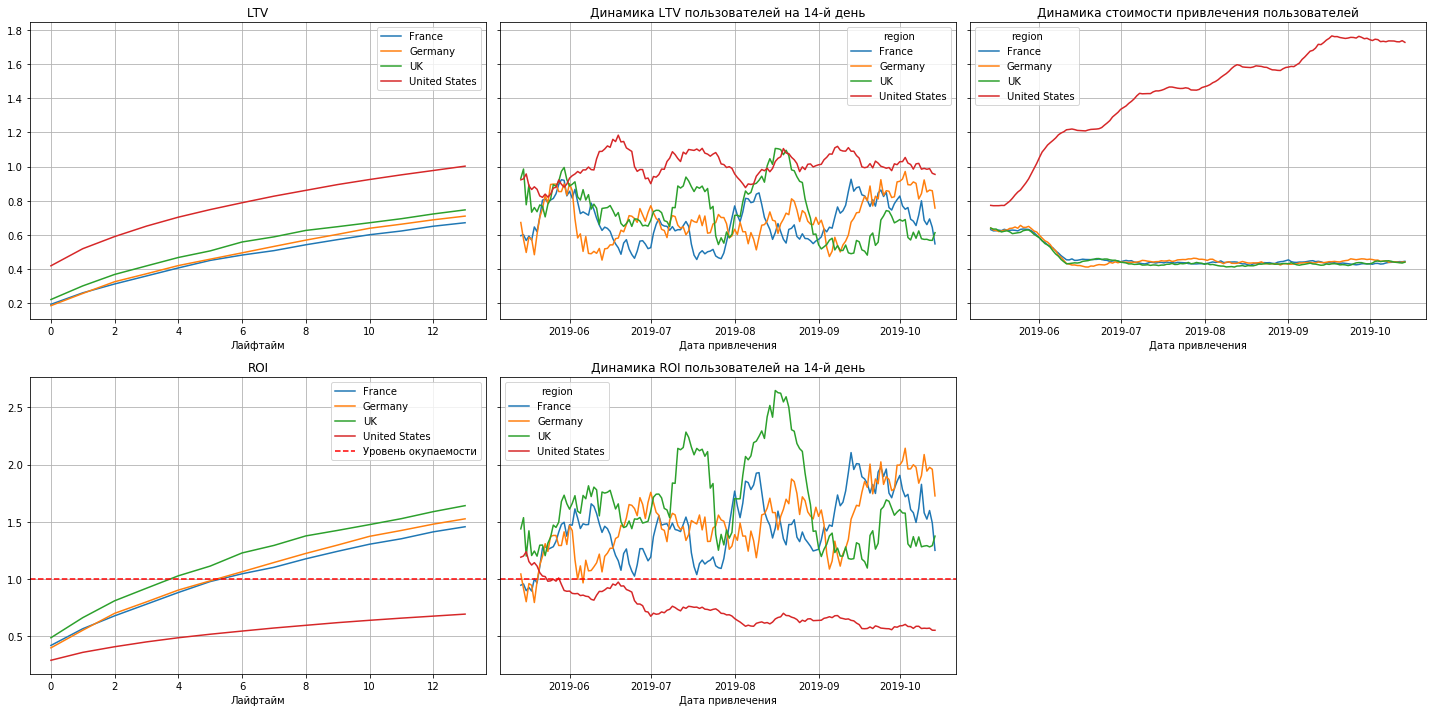

In [62]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вот что говорят графики:
* Реклама окупается на 2-4 день везде во Франции, Германии,Великобритании.В США реклама не окупается.
* Стоимость привлечения стабильна и одинакова для всех стран, кроме США, в США она увеличена.
* LTV всё так же подвержен сезонности во всех странах, кроме США.
* Больше всего затрат на рекламу у США.
* «Пожизненная ценность» клиента выше в США.

Посмотрим затраты по каналам привлечения в США.

In [63]:
profiles_3 = profiles_2[profiles_2['region']=='United States']

profiles_3 = (
        profiles_3.groupby('channel')
        .agg({'acquisition_cost': 'sum'})
        .sort_values(by='acquisition_cost')
             )

sum_pr=sum(profiles_3['acquisition_cost'])
profiles_3['perc']=((profiles_3['acquisition_cost']/sum_pr)*100).round(2)
profiles_3

,acquisition_cost,perc
channel,,
YRabbit,944.22,1.04
MediaTornado,954.48,1.05
RocketSuperAds,1833.00,2.02
FaceBoom,32445.60,35.68
TipTop,54751.30,60.21


Больше всего затрат в США на TipTop -60% от всего рекламного бюджета, на втором месте FaceBoom - 35%.

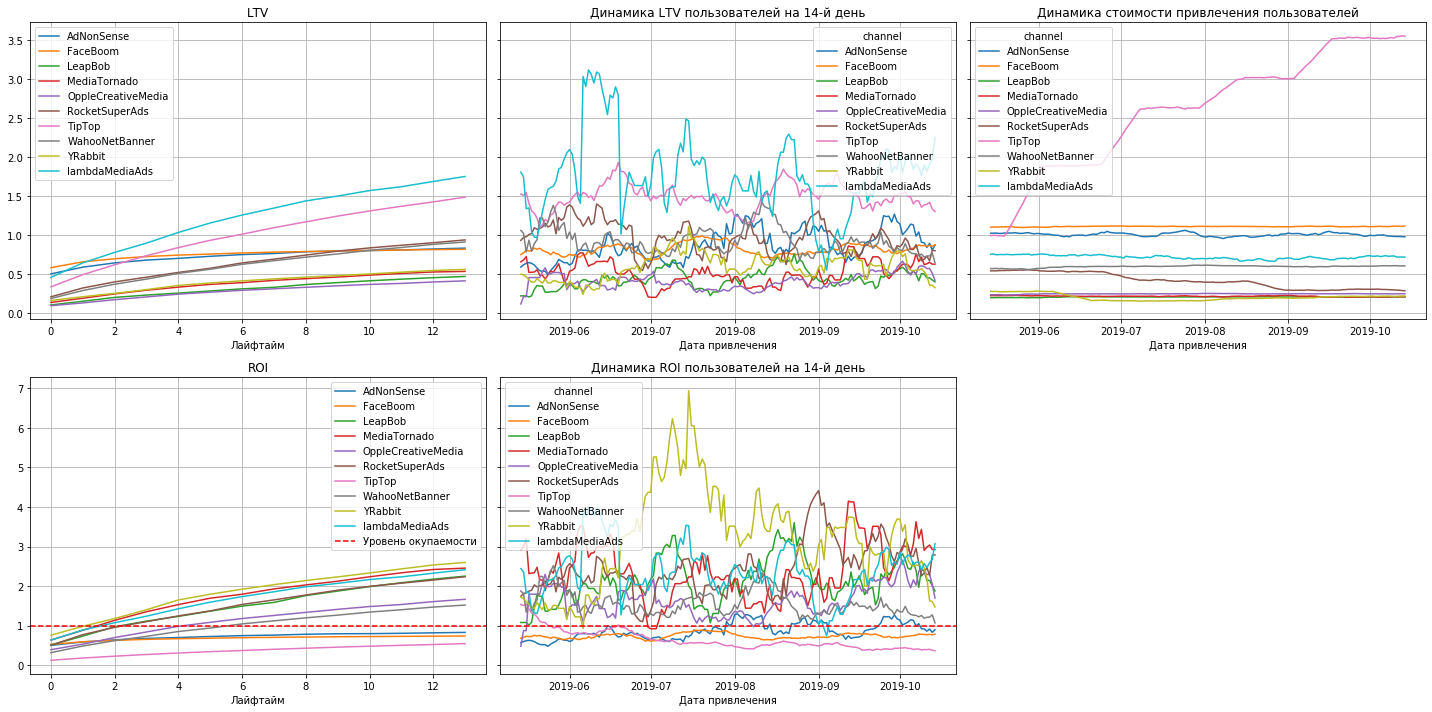

In [64]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

* Больше всего клиенты принесли денег с канала lambdaMediaAds,  на втором месте TipTop. В динамике расходы клиентов на компанию повержены сезонности.
* Больше всего пострачено денег на привлечение клиентов с канала TipTop.
* Все компании начинает окупились, кроме AdNonSense, FaceBoom, TipTop.


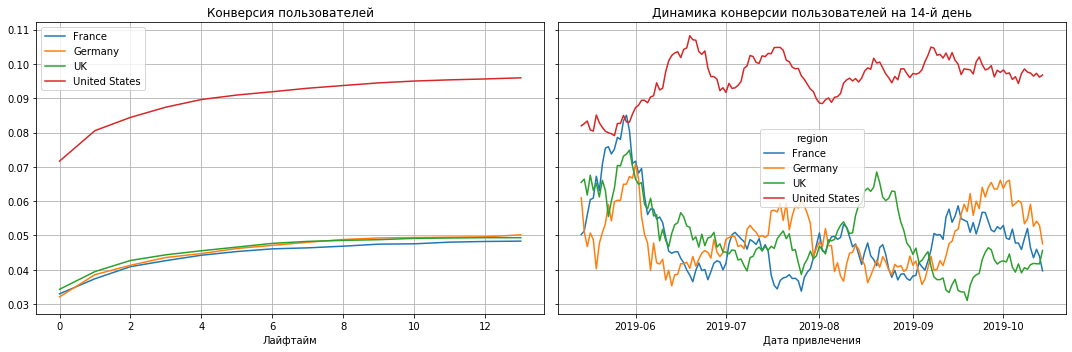

In [65]:
#смотрим конверсию по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у США от 0,07 до 0,10. Остальные страны: Гермния, Великобритания, Франция низко - 0,03-0,05.

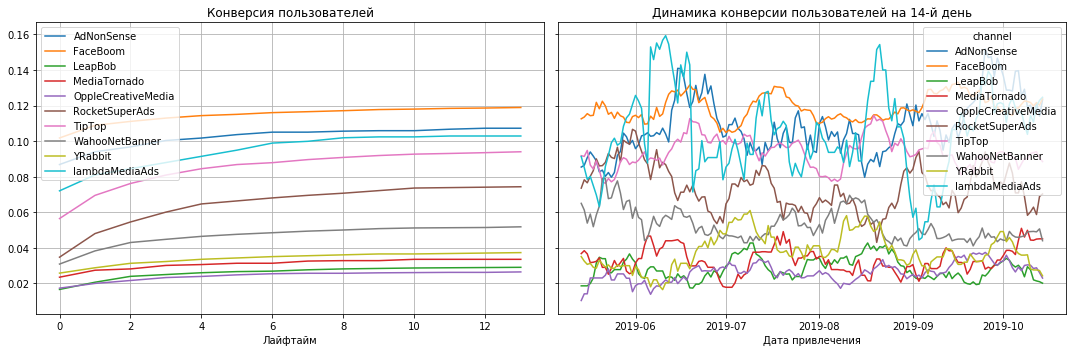

In [66]:
#смотрим конверсию по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Самая высокая конверсия у FaceBoom 0.10. Самая низкая у OppleCreativeMedia - 0,02-0,03.

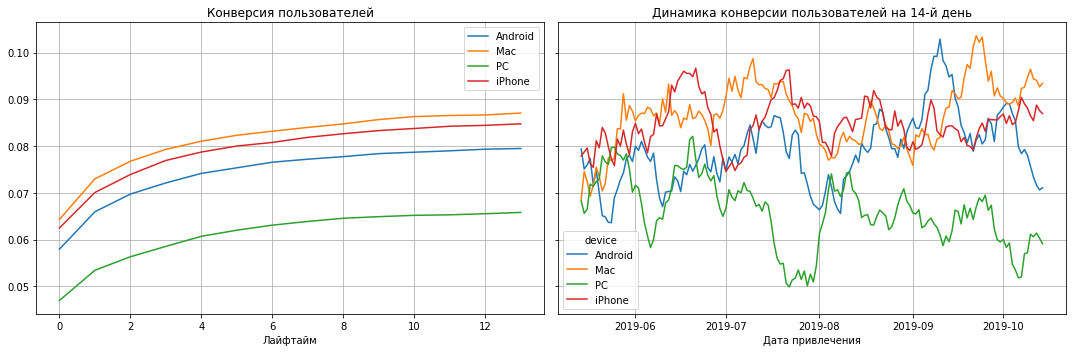

In [67]:
#смотрим конверсию по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Выше всего конверсия у Mac, iPhone. Меньше всего у PC.

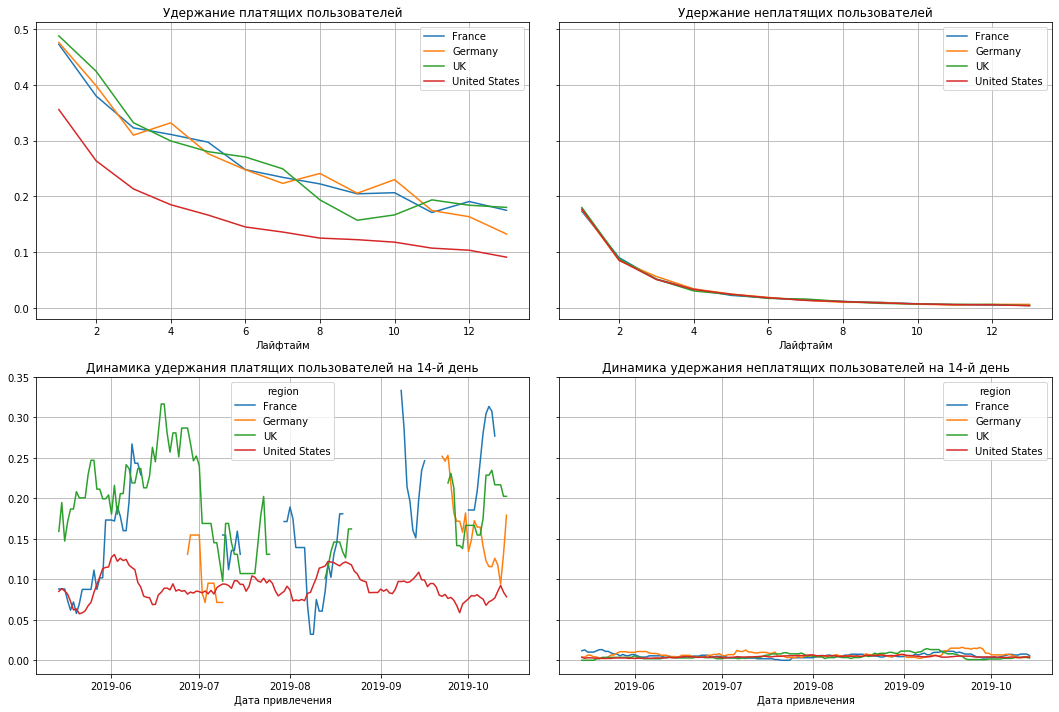

In [68]:
# смотрим удержание по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователе меньше всего в США, у остальных, примерно на одном уровне. Удержание неплатящих пользователей низкое.

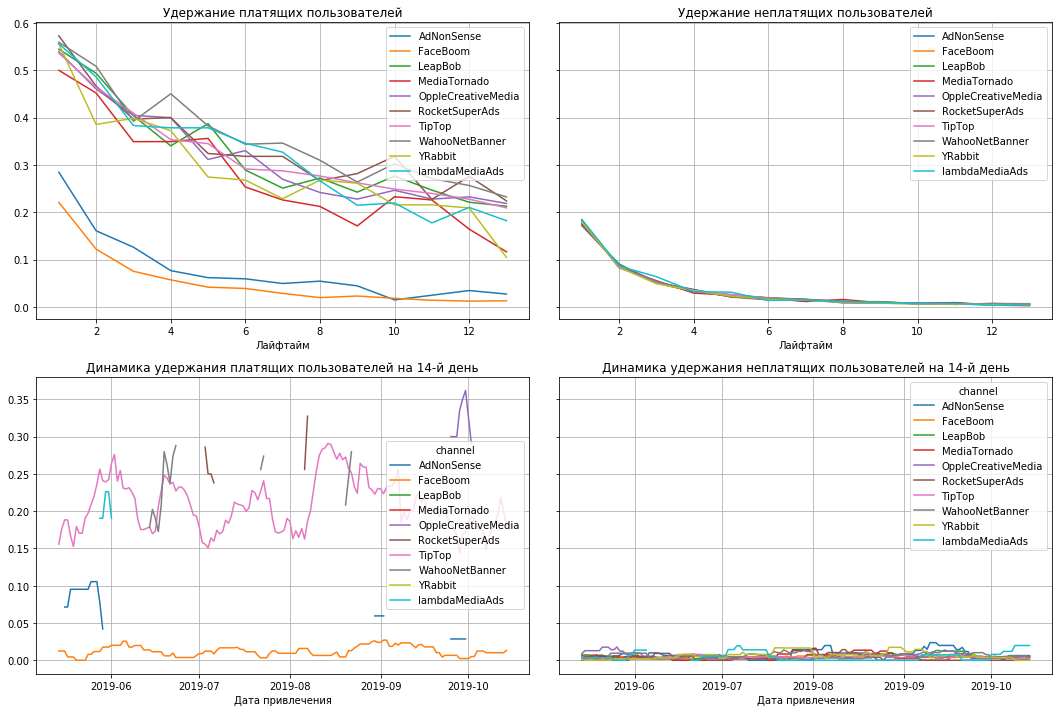

In [69]:
# смотрим удержание по каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Мешьше всего удержание платящих пользователей AdNonSense и FaceBoom. У остальных каналов удержание платящих пользователей одинаково высоко. Удержание неплатящих по каналам пользователей одинаково.

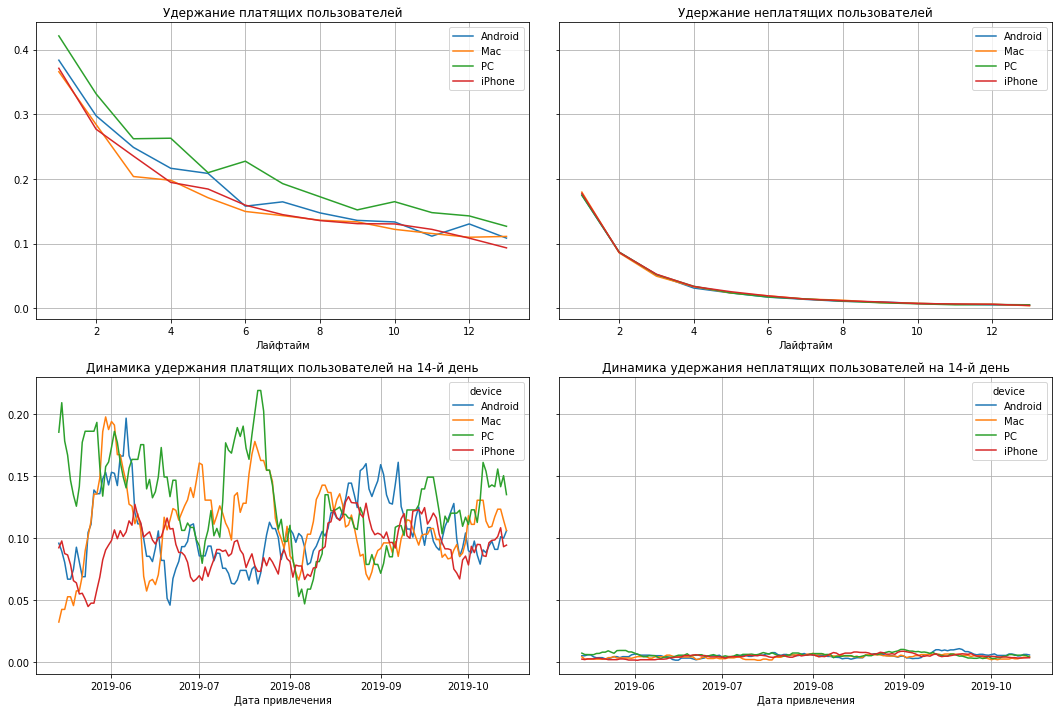

In [70]:
# смотрим удержание по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих по  устройствам больше всего у PC, но, впринципе, все на одном уровне.Удержание неплатящих по  устройствам  пользователей одинаково.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Больше всего платящих пользователей в США 6.9% от общего числа пользователей. Меньше всего во Франции - 3.8%.
Больше всего платящих пользователей на Mac 6.36% от общего числа пользователей. Меньше всего PC - 5.05%.
Больше всего окупаемость  с канала FaceBoom-12.20% и AdNonSense-11.34%. Меньше всего OppleCreativeMedia - 2.06%.


На TipTop и на FaceBoom больше всего затрат средних месячных. Остальные ниже 2000 и стабильны. Мы видим, что у TipTop поднялись средние месячные затраты примерно 12000 в сентябре (на 5 месяце). Затраты средние месячные на FaceBoom средние месячные постепенно повышаются от 4000 до 6000.


На TipTop и на FaceBoom больше всего недельных затрат. Остальные ниже 500 и стабильны. TipTop с 500 до 4000 волнообразно идут средние недельные затраты на человека. У FaceBoom в идет точно такой же график но ниже от 500 до 1800 средних недельныч затрат на человека.


Меньше всего затрат с канала organic и LeapBob больше - с TipTop. Затраты на TipTop в 4 раза выше среднего.


Больше всего затрат на пользователей TipTop.

Конверсия пользователей идет очень хорошо, причём постоянно от 0,60 до 0,80.

* Реклама окупается у PC на 7 день, у Android на 11 день.У iPhone и Mac не окупается.
* Стоимость привлечения меньше всего у компьютеров и Андроидов, окупаемость тоже выше всего у них, по сравнению с остальными.
* LTV всё так же подвержен сезонности на всех устройствах, но в целом все стабильно.
* Стоимость привлечения больше всего у Маков и айфонов, окупаемость тоже ниже всего у них, по сравнению с остальными.


* Реклама окупается на 2-4 день везде во Франции, Германии,Великобритании.В США реклама не окупается.
* Стоимость привлечения стабильна и одинакова для всех стран, кроме США, в США она увеличена.
* LTV всё так же подвержен сезонности во всех странах, кроме США.
* Больше всего затрат на рекламу у США.
* «Пожизненная ценность» клиента выше в США.


Больше всего затрат в США на TipTop -60% от всего рекламного бюджета, на втором месте FaceBoom - 35%.


* Больше всего клиенты принесли денег с канала lambdaMediaAds,  на втором месте TipTop. В динамике расходы клиентов на компанию повержены сезонности.
* Больше всего пострачено денег на привлечение клиентов с канала TipTop.
* Все компании начинает окупились, кроме AdNonSense, FaceBoom, TipTop


Самая высокая конверсия у США от 0,07 до 0,10. Остальные страны: Гермния, Великобритания, Франция низко - 0,03-0,05.



Удержание платящих и неплатящих пользователей стабильно уменьшается. Но не платящих все равно меньше.
Самая высокая конверсия у FaceBoom 0.10. Самая низкая у OppleCreativeMedia - 0,02-0,03.
Выше всего конверсия у Mac, iPhone. Меньше всего у PC.
Удержание платящих пользователе меньше всего в США, у остальных, примерно на одном уровне. Удержание неплатящих пользователей низкое.

Мешьше всего удержание платящих пользователей AdNonSense и FaceBoom. У остальных каналов удержание платящих пользователей одинаково высоко. Удержание неплатящих по каналам пользователей одинаково.

Удержание платящих по устройствам больше всего у PC, но, впринципе, все на одном уровне.Удержание неплатящих по устройствам пользователей одинаково.


Персперктивные каналы,страны и девайсы, платящие пользователи для отдела маркетинга:

* платящие пользователи в США(но реклама не окупается на канале TioTop поэтому рекомендвется уменьшить растраты на этот канал)
* платящие пользователи на Mac
* платящие пользователи с канала FaceBoom-12.20% и AdNonSense-11.34%
* LeapBob канал получил меньше всего затрат, поэтому тоже является персперктивным
* реклама Android окупается поэтому,тоже каналы являются персперктивными,  а также тут высокое удержание платящих пользователей

